In [118]:
import numpy as np

In [119]:
arr = np.array(
    (( 2, -1,  0,  0),
     (-1,  2, -1,  0),
     ( 0, -1,  2, -1),
     ( 0,  0, -1,  2)
     ))

In [120]:
arr

array([[ 2, -1,  0,  0],
       [-1,  2, -1,  0],
       [ 0, -1,  2, -1],
       [ 0,  0, -1,  2]])

In [121]:
from numpy import linalg as LA

In [122]:
dir(LA)

['LinAlgError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_umath_linalg',
 'cholesky',
 'cond',
 'det',
 'eig',
 'eigh',
 'eigvals',
 'eigvalsh',
 'inv',
 'linalg',
 'lstsq',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'norm',
 'pinv',
 'qr',
 'slogdet',
 'solve',
 'svd',
 'tensorinv',
 'tensorsolve',
 'test']

In [123]:
help(LA.eig)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.

    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed

    Returns
    -------
    A namedtuple with the following attributes:

    eigenvalues : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs

    eigenvectors : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``eigenvectors[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``eigenvalues[i]``.

    R

In [124]:
# w will be array of eigenvalues (in no particular order)
# v will be array with each column v[i] being the eigenvector corresponding to eigenvalue w[i]
w, v = LA.eig(arr)

In [125]:
w

array([3.61803399, 2.61803399, 0.38196601, 1.38196601])

In [126]:
v

array([[-0.37174803, -0.60150096, -0.37174803, -0.60150096],
       [ 0.60150096,  0.37174803, -0.60150096, -0.37174803],
       [-0.60150096,  0.37174803, -0.60150096,  0.37174803],
       [ 0.37174803, -0.60150096, -0.37174803,  0.60150096]])

In [127]:
v[:,1] # Eigenvector corresponding to 2nd eigenvalue w[1]

array([-0.60150096,  0.37174803,  0.37174803, -0.60150096])

In [128]:
# A * v_1
# Don't write arr * v[:,1] XXXXX
arr @ v[:,1]

array([-1.57474994,  0.97324899,  0.97324899, -1.57474994])

In [129]:
# lambda_1 * v_1: this is scalar multiplication
w[1] * v[:,1]

array([-1.57474994,  0.97324899,  0.97324899, -1.57474994])

In [130]:
# S^(-1) * A * S = D (diagonal matrix)
LA.inv(v) @ arr @ v

array([[ 3.61803399e+00,  1.09751611e-15, -1.23072774e-16,
        -1.32732964e-16],
       [ 1.48753494e-15,  2.61803399e+00,  6.99715470e-16,
         2.69864002e-16],
       [ 8.61895449e-16, -2.86750721e-16,  3.81966011e-01,
         1.30321381e-16],
       [ 7.66129884e-16,  1.25707047e-16,  3.24665959e-16,
         1.38196601e+00]])

## Gyration tensor

In [131]:
import numpy as np
import matplotlib.pyplot as plt

r = np.random.uniform(0,1,1000)
theta = np.random.uniform(0,2*np.pi,1000)

In [132]:
# Generate uniformly distributed points on a circle of radius 1
x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)

In [133]:
'''
#help(np.random.uniform)
idx = 0
coord = np.zeros((50,3))
while idx < len(coord):
    c = np.random.uniform(-10,10,3)
    if (c[0]/10)**2+(c[1]/1)**2+(c[2]/1)**2 <= 4:
        coord[idx] = c
        idx += 1
'''

'\n#help(np.random.uniform)\nidx = 0\ncoord = np.zeros((50,3))\nwhile idx < len(coord):\n    c = np.random.uniform(-10,10,3)\n    if (c[0]/10)**2+(c[1]/1)**2+(c[2]/1)**2 <= 4:\n        coord[idx] = c\n        idx += 1\n'

In [134]:
'''
fo = open("coord.xyz", "w")
fo.write(str(len(coord))+"\n")
fo.write("Coordinates ...\n")
for i in range(len(coord)):
    line = f"C \t  {coord[i][0]} \t  {coord[i][1]} \t {coord[i][2]}\n"
    fo.write(line)
fo.close()
'''

'\nfo = open("coord.xyz", "w")\nfo.write(str(len(coord))+"\n")\nfo.write("Coordinates ...\n")\nfor i in range(len(coord)):\n    line = f"C \t  {coord[i][0]} \t  {coord[i][1]} \t {coord[i][2]}\n"\n    fo.write(line)\nfo.close()\n'

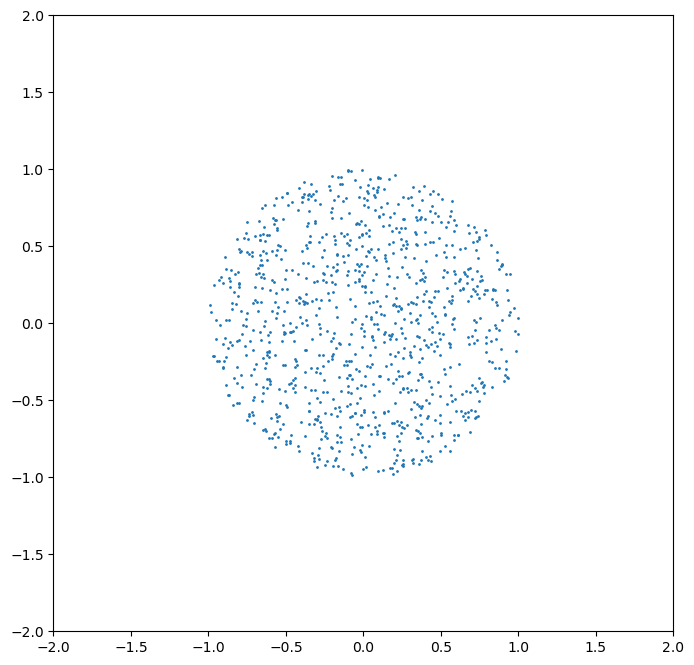

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(x,y,'o',markersize=1.0)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In [136]:
# Transform the circle to ellipse!
width = 80
height = 40
x = x * width/2.0
y = y * height/2.0

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt

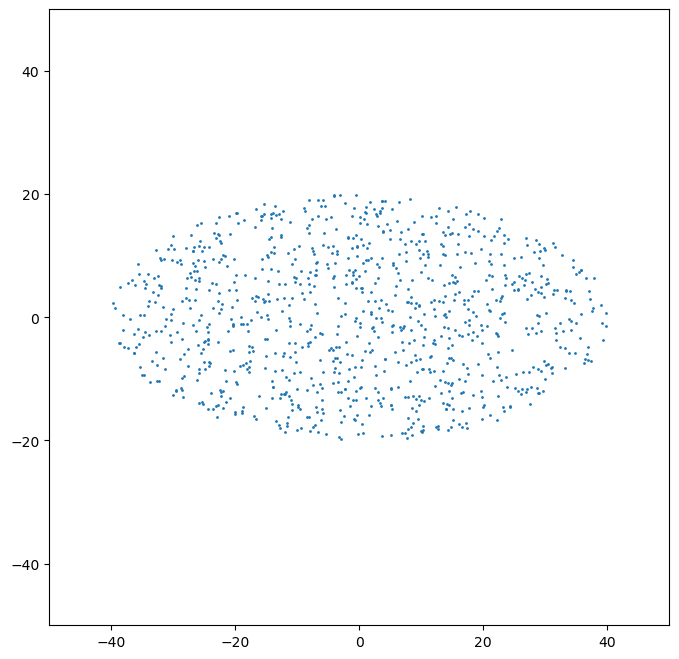

In [138]:
plt.figure(figsize=(8,8))
plt.plot(x,y,'o',markersize=1.0)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

In [139]:
# Combine arrays x and y into a (Nx2) array of coordinates
coord = np.column_stack((x,y))

In [140]:
coord[0]

array([ -8.04396205, -16.22456263])

In [141]:
coord.shape

(1000, 2)

In [142]:
# Define rotation matrix operator
def rotate_2D(mat, theta):
    # theta must be supplied in degrees!
    theta = np.deg2rad(theta)
    rot_mat = np.array(((np.cos(theta),-np.sin(theta)),(np.sin(theta),np.cos(theta))))
    for i in range(len(mat)):
        mat[i] = rot_mat @ mat[i]

In [143]:
# Rotate by 45 degrees ...
rotate_2D(coord, 35.8)

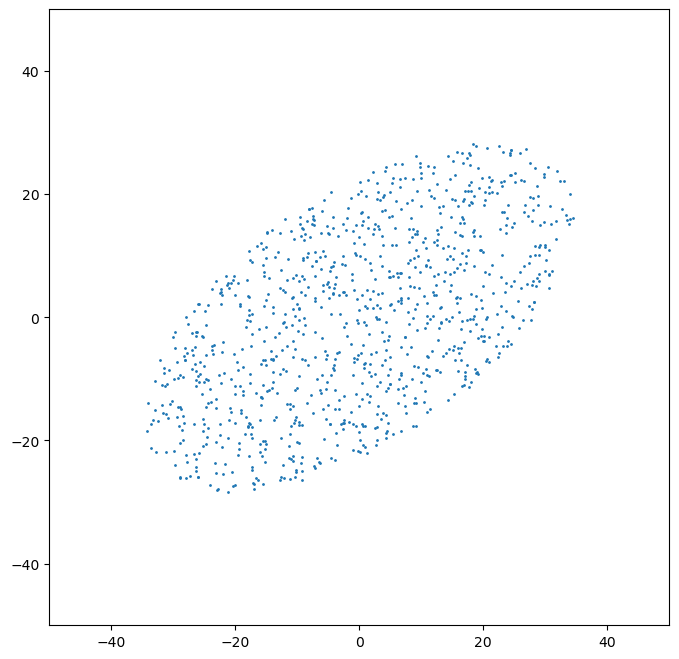

In [144]:
# Coordinates after rotation ...
plt.figure(figsize=(8,8))
plt.plot(coord[:,0],coord[:,1],'o',markersize=1.0)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

## Homework problem is here!

In [145]:
# Define the gyration tensor here! :)
def gyration(coord):   
    gyr = np.zeros((2,2))
    # Coordinate system is shifted such that origin is at COM
    COM = coord.mean(axis=0)
    shifted = coord - COM
    for i in range(len(coord)):
        gyr[0,0] += shifted[i,0]**2
        gyr[0,1] += shifted[i,0]*shifted[i,1]
        gyr[1,1] += shifted[i,1]**2
    gyr /= len(coord)
    gyr[1,0] = gyr[0,1]
    return gyr

## Tasks:

- Complete the code for gyration tensor
- After computing the gyration tensor, get the eigenvectors and eigenvalues
- Try to plot the eigenvectors (as arrows!) over the coordinates. Identify major and minor axes separately.

In [146]:
gyr = gyration(coord)

In [147]:
gyr

array([[289.49942848, 131.49557448],
       [131.49557448, 196.05497447]])

In [148]:
import numpy.linalg as LA
w, v = LA.eig(gyr)

In [149]:
v

array([[ 0.81694787, -0.57671152],
       [ 0.57671152,  0.81694787]])

In [150]:
w

array([382.32666441, 103.22773855])

In [151]:
print(f'Eigenvalue 1: {w[0]}, Eigenvector 1: {v[:,0]}')
print(f'Eigenvalue 2: {w[1]}, Eigenvector 2: {v[:,1]}')

Eigenvalue 1: 382.32666440692674, Eigenvector 1: [0.81694787 0.57671152]
Eigenvalue 2: 103.22773854760952, Eigenvector 2: [-0.57671152  0.81694787]


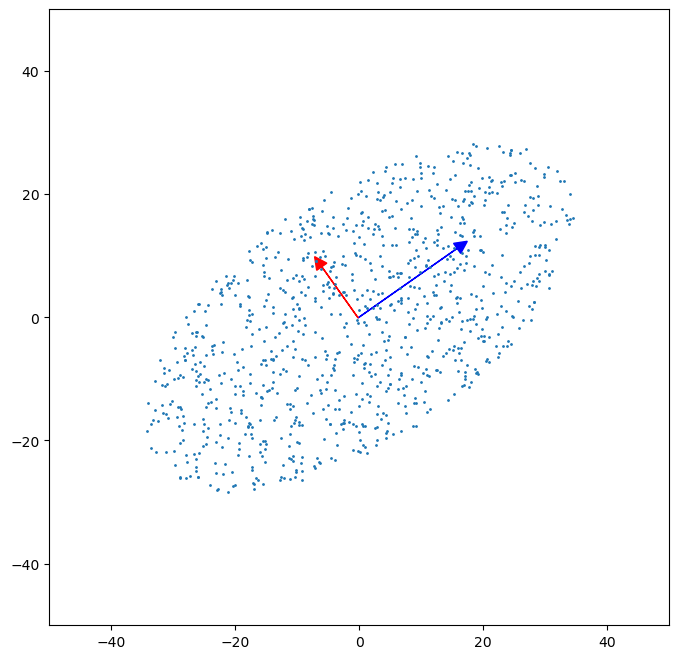

In [152]:
# Coordinates after rotation ...
plt.figure(figsize=(8,8))
plt.plot(coord[:,0],coord[:,1],'o',markersize=1.0)
plt.xlim(-50,50)
plt.ylim(-50,50)

COM = coord.mean(axis=0)
dx = np.sqrt(w[0])*v[:,0][0]
dy = np.sqrt(w[0])*v[:,0][1]
plt.arrow(COM[0], COM[1], dx, dy, head_width=2, head_length=2, fc='b', ec='b')

dx = np.sqrt(w[1])*v[:,1][0]
dy = np.sqrt(w[1])*v[:,1][1]
plt.arrow(COM[0], COM[1], dx, dy, head_width=2, head_length=2, fc='r', ec='r')
plt.show()

In [153]:
print("Rg = ", np.sqrt(w[0]+w[1]))

Rg =  22.03529902121903


In [154]:
w[0]/w[1]

3.7037202382438554

Critical Points (stationary points):

Classification of stationary points:


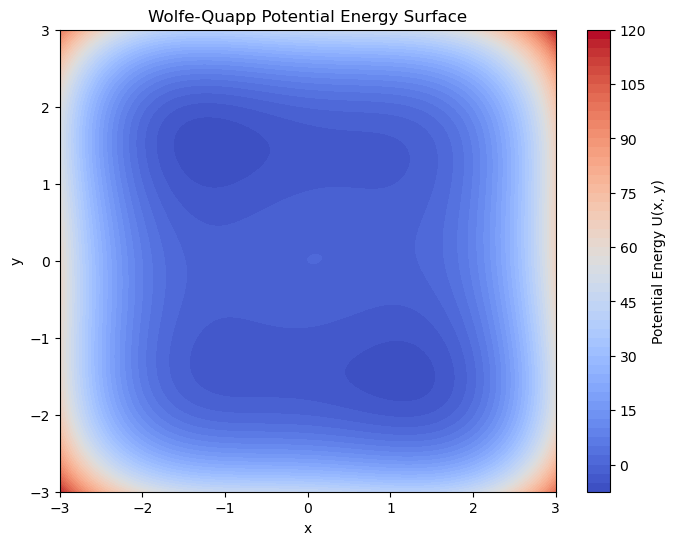

In [9]:
"""
Find and visualize the local minima, maxima, and saddle points
for the 2D Wolfe–Quapp potential:
    U(x, y) = x^4 + y^4 − 2x^2 − 4y^2 + x*y + 0.3x + 0.1y
"""

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, Eq, solve, hessian

# Step 1. Define the symbolic function U(x, y)
x, y = symbols('x y', real=True)
U = x**4 + y**4 - 2*x**2 - 4*y**2 + x*y + 0.3*x + 0.1*y

# Step 2. Find stationary points (where ∇U = 0)
Ux = diff(U, x)
Uy = diff(U, y)

# Solve for points where gradient = 0
critical_points = solve([Eq(Ux, 0), Eq(Uy, 0)], (x, y), dict=True)
print("Critical Points (stationary points):")
for pt in critical_points:
    print(f"  (x, y) = ({pt[x]:.4f}, {pt[y]:.4f})")

# Step 3. Classify the stationary points
H = hessian(U, (x, y))  # 2x2 Hessian matrix
print("\nClassification of stationary points:")
for pt in critical_points:
    H_eval = np.array(H.subs(pt)).astype(float)
    eigvals = np.linalg.eigvals(H_eval)
    ux, uy = float(pt[x]), float(pt[y])
    
    if np.all(eigvals > 0):
        point_type = "Local minimum"
    elif np.all(eigvals < 0):
        point_type = "Local maximum"
    else:
        point_type = "Saddle point"
    
    print(f"  ({ux:.4f}, {uy:.4f}) → {point_type}, Eigenvalues: {eigvals}")

# Step 4. Plot the energy surface (contour plot)
X = np.linspace(-3, 3, 300)
Y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(X, Y)

# Evaluate U(x, y) numerically
U_func = lambda x, y: x**4 + y**4 - 2*x**2 - 4*y**2 + x*y + 0.3*x + 0.1*y
Z = U_func(X, Y)

# Create contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy U(x, y)')
plt.title('Wolfe-Quapp Potential Energy Surface')
plt.xlabel('x')
plt.ylabel('y')

# Mark critical points on the plot
for pt in critical_points:
    plt.plot(float(pt[x]), float(pt[y]), 'ko', markersize=6)
    plt.text(float(pt[x]) + 0.1, float(pt[y]) + 0.1,
             f"({float(pt[x]):.2f},{float(pt[y]):.2f})",
             color='black', fontsize=8)

plt.show()


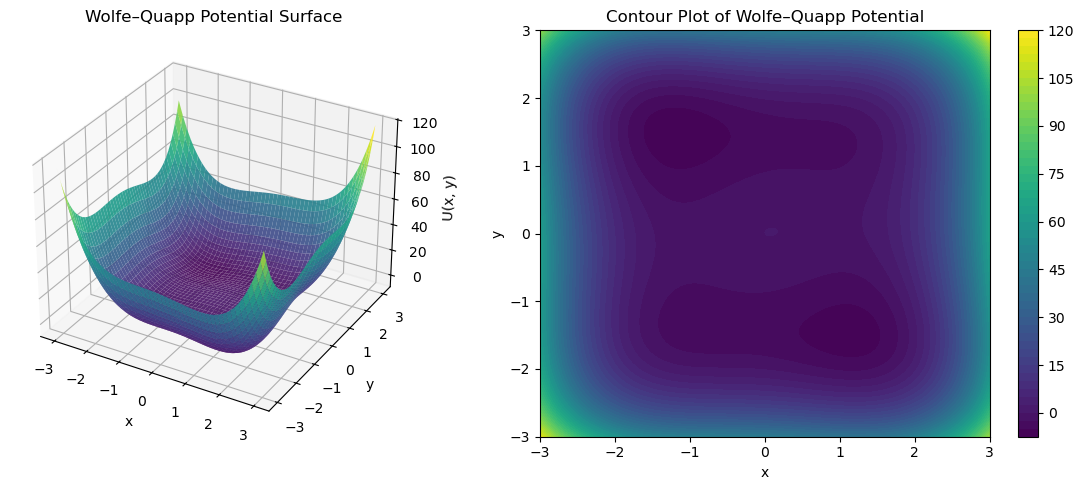

Stationary Points (x, y) and Classification:

Point: [-0.82191 -1.36673],  Nature: Local Minimum,  Eigenvalues: [ 4.01  14.512]
Point: [-1.17406  1.47709],  Nature: Local Minimum,  Eigenvalues: [12.369 18.354]
Point: [ 1.1241  -1.48527],  Nature: Local Minimum,  Eigenvalues: [11.029 18.607]
Point: [0.58231 1.36885],  Nature: Saddle Point,  Eigenvalues: [-0.    14.554]
Point: [0.0812  0.02266],  Nature: Local Maximum,  Eigenvalues: [-3.689 -8.226]


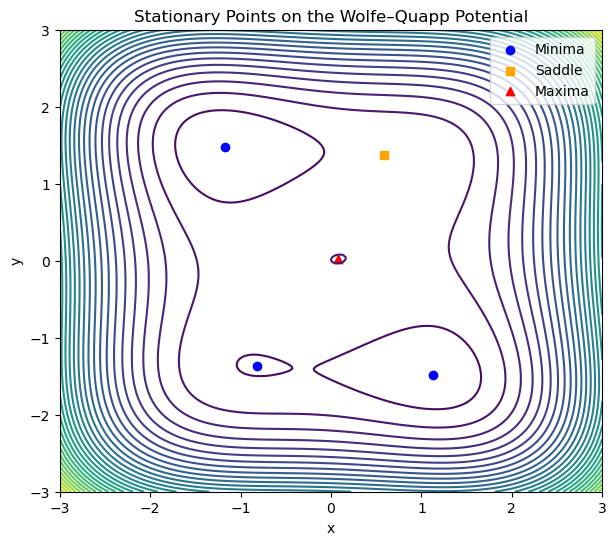

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# ------------------------------------------------------------
# Step 1: Define the Wolfe–Quapp potential function
# ------------------------------------------------------------
def U(x, y):
    """Wolfe–Quapp potential function."""
    return x**4 + y**4 - 2*x**2 - 4*y**2 + x*y + 0.3*x + 0.1*y


# ------------------------------------------------------------
# Step 2: Compute the gradient (∂U/∂x, ∂U/∂y)
# ------------------------------------------------------------
def grad_U(v):
    """Gradient of U as [dU/dx, dU/dy]."""
    x, y = v
    dUx = 4*x**3 - 4*x + y + 0.3
    dUy = 4*y**3 - 8*y + x + 0.1
    return np.array([dUx, dUy])


# ------------------------------------------------------------
# Step 3: Compute the Hessian (second derivatives matrix)
# ------------------------------------------------------------
def hessian_U(v):
    """Hessian matrix of U."""
    x, y = v
    Hxx = 12*x**2 - 4
    Hyy = 12*y**2 - 8
    Hxy = Hyx = 1
    return np.array([[Hxx, Hxy], [Hyx, Hyy]])


# ------------------------------------------------------------
# Step 4: Create grid for visualization
# ------------------------------------------------------------
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

# ------------------------------------------------------------
# Step 5: Visualize the potential surface and contour
# ------------------------------------------------------------
fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax1.set_title('Wolfe–Quapp Potential Surface')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('U(x, y)')

# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
cont = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cont, ax=ax2)
ax2.set_title('Contour Plot of Wolfe–Quapp Potential')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# Step 6: Find stationary points using scipy.optimize.minimize
# ------------------------------------------------------------
# We'll start from multiple initial guesses to explore all possible stationary points
initial_guesses = [
    (-2, -2), (-2, 2), (2, -2), (2, 2), 
    (0, 0), (1, 1), (-1, 1), (1, -1)
]

found_points = []

for guess in initial_guesses:
    res = minimize(lambda v: np.linalg.norm(grad_U(v)), guess, method='BFGS')
    point = np.round(res.x, 5)
    if not any(np.allclose(point, p, atol=1e-3) for p in found_points):
        found_points.append(point)

# ------------------------------------------------------------
# Step 7: Classify stationary points (min / max / saddle)
# ------------------------------------------------------------
print("Stationary Points (x, y) and Classification:\n")
for p in found_points:
    H = hessian_U(p)
    eigvals = np.linalg.eigvals(H)

    if np.all(eigvals > 0):
        nature = "Local Minimum"
    elif np.all(eigvals < 0):
        nature = "Local Maximum"
    else:
        nature = "Saddle Point"

    print(f"Point: {p},  Nature: {nature},  Eigenvalues: {np.round(eigvals,3)}")


# ------------------------------------------------------------
# Step 8: Plot contour with identified stationary points
# ------------------------------------------------------------
plt.figure(figsize=(7, 6))
plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stationary Points on the Wolfe–Quapp Potential')

# Mark stationary points
for p in found_points:
    H = hessian_U(p)
    eigvals = np.linalg.eigvals(H)
    if np.all(eigvals > 0):
        plt.scatter(p[0], p[1], color='blue', marker='o', label='Minima')
    elif np.all(eigvals < 0):
        plt.scatter(p[0], p[1], color='red', marker='^', label='Maxima')
    else:
        plt.scatter(p[0], p[1], color='orange', marker='s', label='Saddle')

# Avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys())
plt.show()


Critical Points (stationary points):

Classification of stationary points:


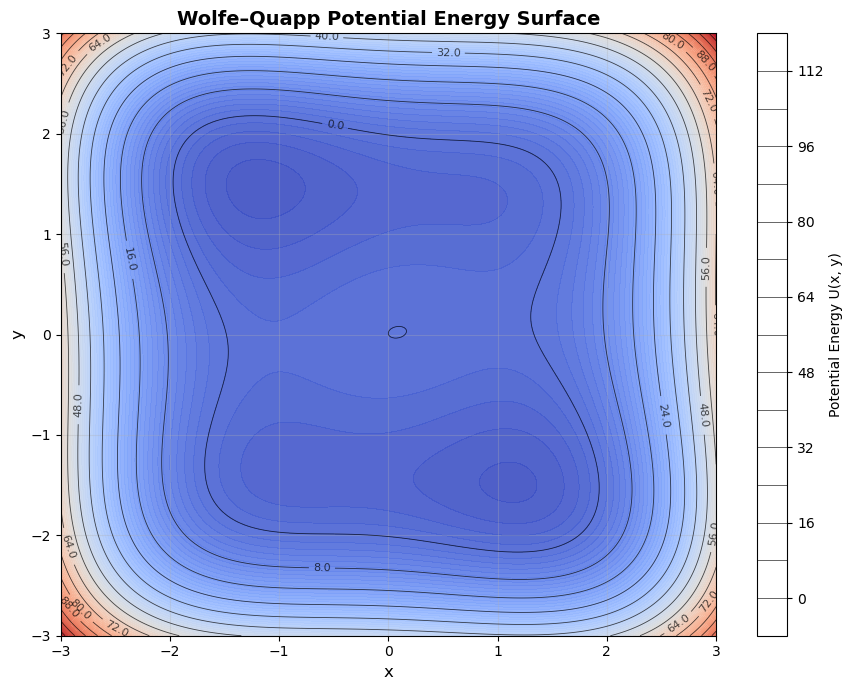

In [10]:
"""
Find and visualize the local minima, maxima, and saddle points
for the 2D Wolfe–Quapp potential:
    U(x, y) = x^4 + y^4 − 2x^2 − 4y^2 + x*y + 0.3x + 0.1y
"""

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, Eq, solve, hessian

# Step 1. Define the symbolic function U(x, y)
x, y = symbols('x y', real=True)
U = x**4 + y**4 - 2*x**2 - 4*y**2 + x*y + 0.3*x + 0.1*y

# Step 2. Find stationary points (where ∇U = 0)
Ux = diff(U, x)
Uy = diff(U, y)

# Solve for points where gradient = 0
critical_points = solve([Eq(Ux, 0), Eq(Uy, 0)], (x, y), dict=True)
print("Critical Points (stationary points):")
for pt in critical_points:
    print(f"  (x, y) = ({pt[x]:.4f}, {pt[y]:.4f})")

# Step 3. Classify stationary points
H = hessian(U, (x, y))
print("\nClassification of stationary points:")
classified_points = []
for pt in critical_points:
    H_eval = np.array(H.subs(pt)).astype(float)
    eigvals = np.linalg.eigvals(H_eval)
    ux, uy = float(pt[x]), float(pt[y])

    if np.all(eigvals > 0):
        point_type = "Local minimum"
        color = 'limegreen'
    elif np.all(eigvals < 0):
        point_type = "Local maximum"
        color = 'red'
    else:
        point_type = "Saddle point"
        color = 'gold'

    classified_points.append((ux, uy, point_type, color))
    print(f"  ({ux:.4f}, {uy:.4f}) → {point_type}, Eigenvalues: {eigvals}")

# Step 4. Plot the potential energy surface
X = np.linspace(-3, 3, 400)
Y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(X, Y)
U_func = lambda x, y: x**4 + y**4 - 2*x**2 - 4*y**2 + x*y + 0.3*x + 0.1*y
Z = U_func(X, Y)

# Step 5. Create an enhanced contour plot
plt.figure(figsize=(9, 7))
contour = plt.contourf(X, Y, Z, levels=100, cmap='coolwarm', alpha=0.9)
contour_lines = plt.contour(X, Y, Z, levels=15, colors='black', linewidths=0.6, alpha=0.7)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

plt.colorbar(label='Potential Energy U(x, y)')
plt.title('Wolfe–Quapp Potential Energy Surface', fontsize=14, fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

# Highlight critical points
for ux, uy, ptype, color in classified_points:
    plt.plot(ux, uy, 'o', color=color, markersize=10, markeredgecolor='black', markeredgewidth=1.2)
    plt.text(ux + 0.1, uy + 0.1, ptype, color='black', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# Cosmetic improvements
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
